In [1]:
import matplotlib.pyplot as plt, numpy as np, time
%matplotlib inline

In [2]:
# utility for drawing planes in 3d
def figsetup():
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_box_aspect((1,1,1))
    ax.set_xticks(np.arange(-1,1.1,.5)), ax.set_yticks(np.arange(-1,1.1,.5))
    ax.set_xlim(-1,1), ax.set_ylim(-1,1)
    return ax

# and few sample planes
xx, yy = np.meshgrid(np.linspace(-1, 1, 100), np.linspace(-1, 1, 100))

Z0 = xx +.5
Z1 = xx +.25
Z2 = xx -.25
Z3 = xx -.5

#with ReLU
Z0[Z0<0] = 0
Z1[Z1<0] = 0
Z2[Z2<0] = 0
Z3[Z3<0] = 0

numpy.ndarray

The [1-n-1.interactive](https://nbviewer.org/url/www.cs.cornell.edu/~ginsparg/1-n-1.interactive.ipynb) example showed how any single variable function $y(x)$ could be approximated by a neural network with ReLU activations, where neurons turning on or off at appropriate values of $x$ cause changes in the slope, providing a piecewise linear approximation.

In [Example_linearvsRELUclassifier](https://nbviewer.org/url/www.cs.cornell.edu/~ginsparg/Example_linearvsRELUclassifier.ipynb) we saw a generalization of this to two dimensional features and a four category classification task.

[lec22_torch](https://nbviewer.org/url/courses.cit.cornell.edu/info3950_2023sp/lec22_torch.ipynb) showed plots of the four functions both before and after adding applying the softmax:

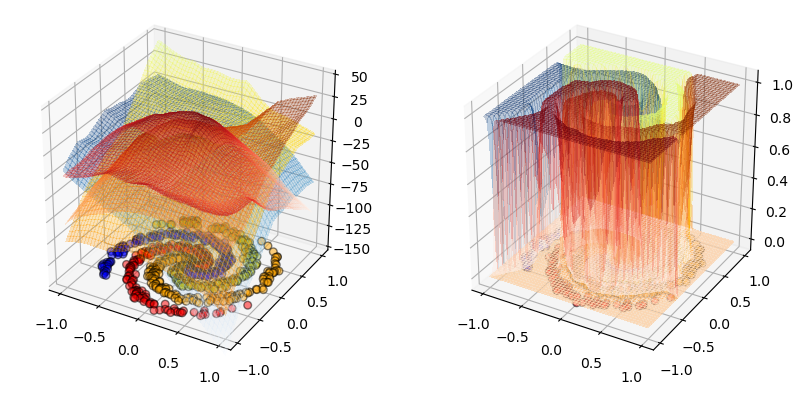

In [3]:
from IPython.display import Image
Image('4class.png')

This addendum tries to clarify how neurons turning on permits learning functions like the above, generalizing the case of functions of a single variable.

Rcall that the ReLU function applied to some linear function $wx+b$ of a single variable has the form below, but with the slope given by $w$ and the point where it turns on by $-b/w$:

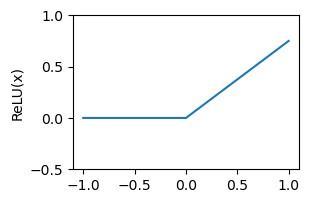

In [4]:
plt.figure(figsize=(3,2))
x = np.linspace(-1,1,9)
y = .75*x
y[y<0] = 0
plt.gca().set(ylim=(-.5,1), aspect=1, ylabel='ReLU(x)')

plt.plot(x,y);

As a function ReLU($wx + vy +b$) with two variables $x,y$, it looks as below, where adjusting $w,v,b$ now permits tuning the location and orientation of the line in the x,y plane where the function turns on, and again the slope with which it increases:

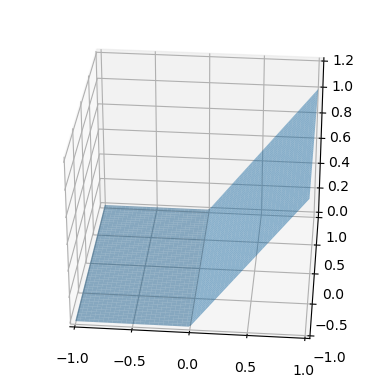

In [5]:
ax = figsetup()
ax.view_init(azim=-85)
Z = xx.copy() # generates the plane z=x, independent of y
Z[Z<0] = 0  #zeroes the part with z<0

ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.5)
ax.set_box_aspect((1,1,.8))
ax.set_zlim(0,1.2);

To see the possibilities for creating arbitrary surfaces out of (sufficiently many) such building blocks, consider first two neurons turning on with the same slope but at a slight displacement:

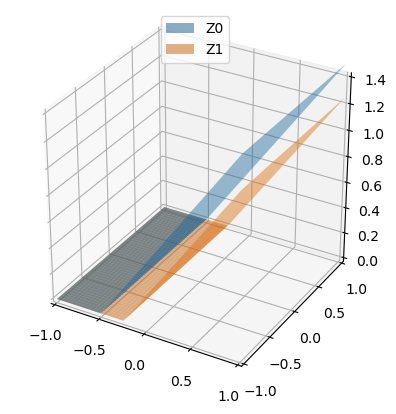

In [6]:
ax = figsetup()
s0 = ax.plot_surface(xx, yy, Z0.reshape(xx.shape), alpha=.5, label='Z0')
s1 = ax.plot_surface(xx, yy, Z1.reshape(xx.shape), alpha=.5, label='Z1');
for surf in (s0,s1): surf._facecolors2d = surf._facecolor3d #needed for legend
ax.set_zlim(0,1.4)
ax.legend(loc='upper center');

Adding these surfaces with opposite weights, i.e., subtracting the orange surface from the blue one, gives the green surface below which rises then flattens out:

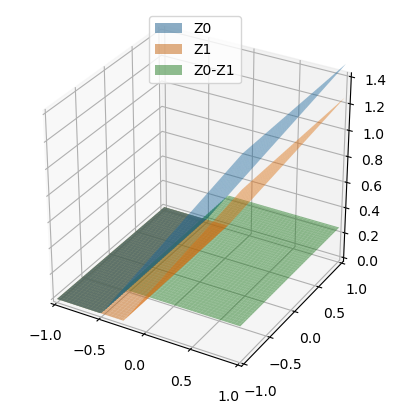

In [7]:
ax = figsetup()
Z = Z0-Z1
s0 = ax.plot_surface(xx, yy, Z0.reshape(xx.shape), alpha=.5, label='Z0')
s1 = ax.plot_surface(xx, yy, Z1.reshape(xx.shape), alpha=.5, label='Z1');
s2 = ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.5, label='Z0-Z1')
for surf in (s0,s1,s2): surf._facecolors2d = surf._facecolor3d
ax.set_zlim(0,1.4)
ax.legend(loc='upper center');

Using two more neurons, and subtracting in the opposite direction gives the brown surface below:

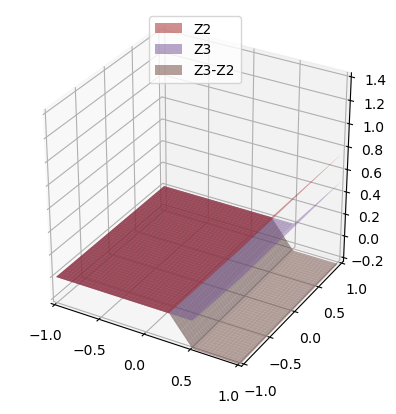

In [8]:
ax = figsetup()
Z = Z3-Z2
s0 = ax.plot_surface(xx, yy, Z2.reshape(xx.shape), color='C3', alpha=.5, label='Z2')
s1 = ax.plot_surface(xx, yy, Z3.reshape(xx.shape), color='C4', alpha=.5, label='Z3');
s2 = ax.plot_surface(xx, yy, Z.reshape(xx.shape), color='C5', alpha=.5, label='Z3-Z2')
for surf in (s0,s1,s2): surf._facecolors2d = surf._facecolor3d
ax.set_zlim(-.2,1.4)
ax.legend(loc='upper center');

Adding the first step up and the second step down results in:

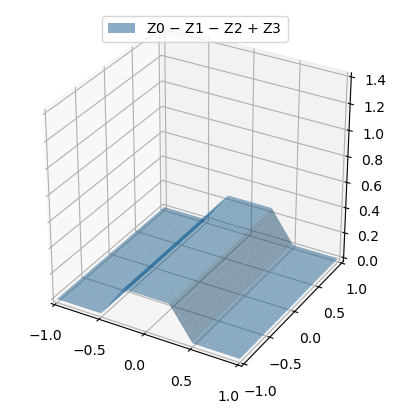

In [9]:
ax = figsetup()
Z = Z0-Z1-Z2+Z3
surf = ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.5, label='Z0 $-$ Z1 $-$ Z2 $+$ Z3')
surf._facecolors2d = surf._facecolor3d
ax.set_zlim(0,1.4)
ax.legend(loc='upper center');

This illustrates how the ReLU function applied to linear functions of $x,y$ can be used to build arbitrary functions, visualized here as a surface.  This simple example can be modified in various ways by changing angles and slopes. For fun we'll leave it in its symmetric form, but define a function that permits rotating it:

In [10]:
def hut(w0,w1):
    Zr = w0*xx + w1*yy
    Z = [Zr + a for a in (.5,.25,-.25,-.5)]
    for i in range(4): Z[i][Z[i]<0] = 0
    return Z[0]-Z[1]-Z[2]+Z[3]

Exchanging the roles of $x,y$ rotates it by $90^\circ$:

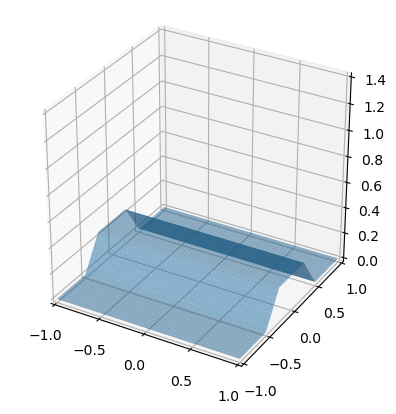

In [11]:
ax = figsetup()
Z = hut(0,1)
ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.5, label='Z0-Z1')
ax.set_zlim(0,1.4);

Adding the original and rotated versions gives:

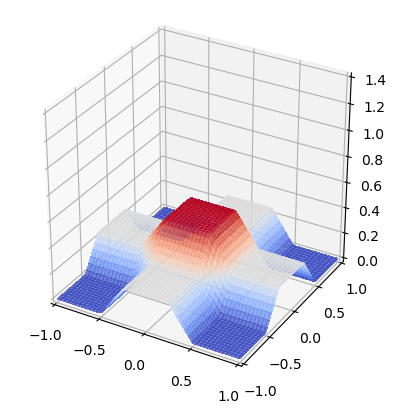

In [12]:
ax = figsetup()
Z = hut(1,0) + hut(0,1)
ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.75, label='Z0-Z1', cmap='coolwarm', antialiased=False)
ax.set_zlim(0,1.4);

Adding in two more versions rotated by $\pm 45^\circ$ gives:

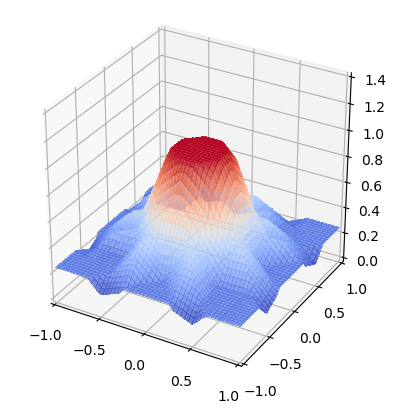

In [13]:
ax = figsetup()
Z= hut(1,0) + hut(0,1) + hut(np.cos(np.pi/4), np.sin(np.pi/4)) + hut(np.cos(np.pi/4), np.sin(-np.pi/4))
ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.75, label='Z0-Z1', cmap='coolwarm', antialiased=False)
ax.set_zlim(0,1.4);

Adding 32 of them together at multiples of $(180/32)^\circ$ gives something approximating round (i.e., cylindrical symmetry):

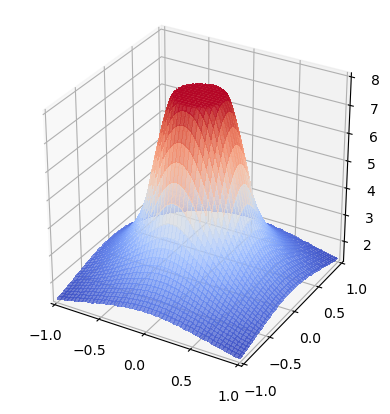

In [14]:
ax=figsetup()
Z = np.zeros((100,100))
for th in np.linspace(0, np.pi, 32, endpoint=False): Z += hut(np.cos(th), np.sin(th))

ax.plot_surface(xx, yy, Z.reshape(xx.shape), alpha=.75, cmap='coolwarm', antialiased=False);